In [2]:
import os 
import pandas as pd
import  matplotlib.pyplot as plt
df=pd.read_csv("Necesito_0.csv")

In [17]:

df.head(3)

,PERIODO,ESTU_CONSECUTIVO,ESTU_TIPODOCUMENTO,ESTU_PAIS_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_MCPIO_RESIDE,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,...,FAMI_TIENEINTERNET,FAMI_EDUCACIONMADRE,INST_ORIGEN,MOD_RAZONA_CUANTITAT_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_INGLES_DESEM,MOD_LECTURA_CRITICA_PUNT,MOD_INGLES_PUNT,MOD_COMPETEN_CIUDADA_PUNT
0,20183,EK201830018930,CC,COLOMBIA,5.0,ANTIOQUIA,5088.0,BELLO,NaN,NaN,...,Si,Secundaria (Bachillerato) completa,OFICIAL DEPARTAMENTAL,153,158.0,3.0,-A1,147,97,100
1,20183,EK201830045060,CC,COLOMBIA,5.0,ANTIOQUIA,5001.0,MEDELLÍN,3.050010e+11,5001.0,...,Si,Secundaria (Bachillerato) completa,OFICIAL DEPARTAMENTAL,91,199.0,4.0,A1,151,135,151
2,20183,EK201830131391,CC,COLOMBIA,5.0,ANTIOQUIA,5088.0,BELLO,NaN,NaN,...,Si,Secundaria (Bachillerato) completa,OFICIAL DEPARTAMENTAL,178,126.0,2.0,A1,185,141,162


## Data Cleaning
Elimación de datos que no tienen nada que ver con el objetivo del analisis 

In [9]:
#Analisis de valores nulos

print (f"hay 4602 datos el 10% sería 46") 
df.isnull().sum()

hay 4602 datos el 10% sería 46


ano_prueba                          0
ESTU_CONSECUTIVO                    0
ESTU_DEPTO_RESIDE                  21
ESTU_MCPIO_RESIDE                  21
INST_NOMBRE_INSTITUCION             0
ESTU_NUCLEO_PREGRADO                0
ESTU_INST_DEPARTAMENTO              0
ESTU_INST_MUNICIPIO                 0
ESTU_PRGM_ACADEMICO                 0
ESTU_VALORMATRICULAUNIVERSIDAD     36
ESTU_DEPTO_PRESENTACION             0
ESTU_MCPIO_PRESENTACION             0
ESTU_PAGOMATRICULABECA             40
ESTU_PAGOMATRICULACREDITO          41
ESTU_HORASSEMANATRABAJA             0
ESTU_GENERO                         1
ESTU_PAGOMATRICULAPADRES           39
año_presentacio                     0
ESTU_PAGOMATRICULAPROPIO           37
FAMI_EDUCACIONPADRE               123
FAMI_TIENEAUTOMOVIL               244
FAMI_TIENELAVADORA                224
FAMI_ESTRATOVIVIENDA                0
FAMI_TIENECOMPUTADOR              209
FAMI_TIENEINTERNET                134
FAMI_EDUCACIONMADRE               129
INST_ORIGEN 

In [158]:
#2 pregunta
a2019= df[df["Año"]==2019] 
a2019=a2019.groupby(["sector_ies","Año"]) [["sector_ies","graduados"]].sum()
a2019=a2019.sort_values(by=["graduados"], ascending=[False])
oficial=round((207520/(240680+207520))*100,2)
privada=round((240680/(240680+207520))*100,2)
print(f"El % de las ies oficiales es {oficial}%")
print(f"El % de las ies privadas es {privada}%")
a2019

El % de las ies oficiales es 46.3%
El % de las ies privadas es 53.7%


,,graduados
sector_ies,Año,
PRIVADA,2019,240680
OFICIAL,2019,207520


In [173]:
#3 pregunta
formaciones=df[df["nivel_forma"].isin(["UNIVERSITARIA","TECNOLOGICA","FORMACION TECNICA PROFESIONAL"])]
formaciones=formaciones.groupby(["Año","nivel_forma"]) [["nivel_forma","graduados"]].sum()
formaciones


graduados
Año  nivel_forma                             
2016 FORMACION TECNICA PROFESIONAL       1710
     TECNOLOGICA                        12126
     UNIVERSITARIA                      53198
2017 FORMACION TECNICA PROFESIONAL       2111
     TECNOLOGICA                        12090
     UNIVERSITARIA                      55559
2018 FORMACION TECNICA PROFESIONAL       7139
     TECNOLOGICA                        75700
     UNIVERSITARIA                     112455
2019 FORMACION TECNICA PROFESIONAL      15692
     TECNOLOGICA                       118978
     UNIVERSITARIA                     216408

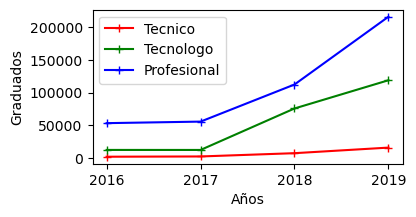

In [189]:
plt.figure(figsize=(4,2))
#FORMACION TECNICA PROFESIONAL	
x=[2016,2017,2018,2019]
y=[1710,2111,7139,15692]
#TECNOLOGIA
y1=[12126,12090,75700,118978]
#PROFESIONAL
y2=[53198,55559,112455,216408]

plt.plot(x,y, marker="+", linestyle="-", color="r", label="Tecnico")
plt.plot(x,y1, marker="+", linestyle="-", color="g", label="Tecnologo")
plt.plot(x,y2, marker="+", linestyle="-", color="b", label="Profesional")
plt.legend ()
plt.xlabel("Años")
plt.ylabel("Graduados")
plt.xticks(x)
plt.show()

In [231]:
#4 Pregunta
totalgrados=df["graduados"].sum()
print(f"total de graduados es:{totalgrados}")
prog_aca=df.groupby(["prog_acade"]) [["graduados"]].sum()
prog_aca=prog_aca.sort_values(by=["graduados"], ascending=[False])
print(f"Admon de empresas es la que mas se graduaron y representa el:{round(100*(42970/totalgrados),2)}% del total")
prog_aca["graduados"].head(3)


total de graduados es:864035
Admon de empresas es la que mas se graduaron y representa el:4.97% del total


prog_acade
ADMINISTRACION DE EMPRESAS    42970
DERECHO                       37755
CONTADURIA PUBLICA            35025
Name: graduados, dtype: int64

In [236]:
#5
dpto=df.groupby(["dpto_dom_ies"]) [["graduados"]].sum()
dpto=dpto.sort_values(by=["graduados"], ascending=[False])
dpto.head(10)

,graduados
dpto_dom_ies,
BOGOTA D.C.,331130
ANTIOQUIA,146692
VALLE DEL CAUCA,77574
SANTANDER,70065
CALDAS,25497
ATLANTICO,22959
CUNDINAMARCA,22080
RISARALDA,21609
NORTE DE SANTANDER,16733


In [348]:
#6
año_19=df[df["Año"]==2019]
virtual_19=año_19[año_19["metodolo"].isin(["DISTANCIA (VIRTUAL)"])] 

virtual_19=virtual_19.groupby(["ies"])[["prog_acade"]].sum

total_ies=año_19.groupby(["ies"])[["prog_acade"]].sum

print(f"total ies en 2019 {total_ies().shape}")
print(f"total ies que tienen programas virtuales en 2019 {virtual_19().shape}")
print(f"% de ies con programas virtuales: {round(100*(76/219),2)}%")



total ies en 2019 (219, 1)
total ies que tienen programas virtuales en 2019 (76, 1)
% de ies con programas virtuales: 34.7%


In [382]:
#7
año_19=df[df["Año"]==2019]
mujeres_gradu=año_19[año_19["Sexo"]=="MUJER"]
mujeres_gradu=mujeres_gradu.groupby(["Sexo", "prog_acade", "Año"]) [["graduados"]].sum()
mujeres_gradu=mujeres_gradu.sort_values(by=["graduados"], ascending=[False])
print(mujeres_gradu.head(3))


hombres_gradu=año_19[año_19["Sexo"]=="HOMBRE"]
hombres_gradu=hombres_gradu.groupby(["Sexo", "prog_acade", "Año"]) [["graduados"]].sum()
hombres_gradu=hombres_gradu.sort_values(by=["graduados"], ascending=[False])
print(hombres_gradu.head(3))

total_graduados=año_19.groupby([ "Año"]) [["graduados"]].sum()
print (total_graduados)
hombres_gradu=hombres_gradu.groupby(["Sexo",  "Año"]) [["graduados"]].sum()
print (hombres_gradu)

mujeres_gradu=mujeres_gradu.groupby(["Sexo",  "Año"]) [["graduados"]].sum()
print(mujeres_gradu)
print (f"porcentaje mujeres {round(100*(253146/448200),1)} %")

                                       graduados
Sexo  prog_acade                 Año            
MUJER ADMINISTRACION DE EMPRESAS 2019      14063
      CONTADURIA PUBLICA         2019      12128
      PSICOLOGIA                 2019      11955
                                        graduados
Sexo   prog_acade                 Año            
HOMBRE ADMINISTRACION DE EMPRESAS 2019       8977
       DERECHO                    2019       7474
       INGENIERIA INDUSTRIAL      2019       5753
      graduados
Año            
2019     448200
             graduados
Sexo   Año            
HOMBRE 2019     195054
            graduados
Sexo  Año            
MUJER 2019     253146
porcentaje mujeres 56.5 %


In [401]:
#8 
ing_ambn=df[df["prog_acade"].isin(["INGENIERIA AMBIENTAL", "INGENIERIA AMBIENTAL Y SANITARIA","INGENIERIA AMBIENTAL Y DE SANEAMIENTO"])]
ing_ambn=ing_ambn.groupby(["ies","dpto_dom_ies", "metodolo", "mun_dom_ies"]) [["graduados"]].sum()
ing_ambn=ing_ambn.sort_values(by=["graduados"], ascending=[False])
ing_ambn.head(3)

,,,,graduados
ies,dpto_dom_ies,metodolo,mun_dom_ies,
CORPORACION UNIVERSITARIA DEL HUILA-CORHUILA-,HUILA,PRESENCIAL,NEIVA,1009
UNIDADES TECNOLOGICAS DE SANTANDER,SANTANDER,PRESENCIAL,BUCARAMANGA,957
UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNAD,BOGOTA D.C.,DISTANCIA (TRADICIONAL),BOGOTA D.C.,871


In [409]:
#9
cali=df[df["mun_dom_ies"]=="CALI"]
tecni=cali[cali["nivel_forma"]=="FORMACION TECNICA PROFESIONAL"]
sector=tecni[tecni["sector_ies"]=="OFICIAL"]
sector=sector.groupby(["ies","prog_acade"]) [["graduados"]].sum()
sector

graduados
ies                                                prog_acade                                                   
INSTITUCION UNIVERSITARIA ANTONIO JOSE CAMACHO     TECNICO PROFESIONAL EN LOGISTICA EMPRESARIAL                1
                                                   TECNICO PROFESIONAL EN PROCESOS EMPRESARIALES              17
                                                   TECNICO PROFESIONAL EN REGISTRO Y CONTROL DE PR...         11
INSTITUTO TECNICO NACIONAL DE COMERCIO SIMON RO... TECNICA PROFESIONAL EN COSTOS Y CONTABILIDAD              152
                                                   TECNICA PROFESIONAL EN GESTION EMPRESARIAL                207
                                                   TECNICA PROFESIONAL EN SALUD OCUPACIONAL                  326
                                                   TECNICO PROFESIONAL EN MERCADEO                             8
                                                   TECNICO PROFESIONAL EN PROCESOS ADMINISTRATIVOS...        280
                                                   TECNICO PROFESIONAL EN PROCESOS DE IMPORTACIONE...         62
                                                   TECNICO PROFESIONAL EN PROCESOS VIALES Y DE TRA...         40

In [421]:
#10
inge=df[df["prog_acade"].isin(["ESPECIALIZACION EN NEGOCIOS INTERNACIONALES"])]

inge=inge.groupby(["mun_dom_ies","ies","prog_acade"]) [["matricu"]].sum()
inge.sort_values(by=["matricu"], ascending=[False])

,,,matricu
mun_dom_ies,ies,prog_acade,
CALI,PONTIFICIA UNIVERSIDAD JAVERIANA,ESPECIALIZACION EN NEGOCIOS INTERNACIONALES,62
